## Class exercise slicing dataframe
Using the file: befkbhalderstatkode.csv 
Use this data:
```python
data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
```
1. wrap the data above in a pandas DataFrame in a way that printing the dataframe and its index and column attributes gives this result: (Hint: print(df);print(df.index);print(df.columns):     

``` 
     Col1 Col2 col3  
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9

Index(['Row1', 'Row2', 'Row3'], dtype='object')
Index(['Col1', 'Col2', 'col3'], dtype='object')
```
(Hint: use the pd.DataFrame(data=, column=, index=) arguments)

2. Make slices of data:
   
   A. second column using column name
   
   B. third column using column index (.iloc[])
   
   C. slice element at third row of second column (use .iloc())

In [3]:
# 1.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

data = np.array([['','Col1','Col2','col3'],
                ['Row1',1,2,3],
                ['Row2',4,5,6],
                ['Row3',7,8,9]])
pd_data = pd.DataFrame(data=data[1:,1:], columns=data[0,1:], index=data[1:,0])
print(pd_data)
print("---------------------------")
# 2.
# A
second_column= pd_data['Col2']
print(second_column)
print("-----------------------")
# B
third_column = pd_data.iloc[:,2]
print(third_column)
print("-----------------------")
# C
third_row_second_column = pd_data.iloc[2,1]
print(third_row_second_column)
print("-----------------------")




Col1 Col2 col3
Row1    1    2    3
Row2    4    5    6
Row3    7    8    9
---------------------------
Row1    2
Row2    5
Row3    8
Name: Col2, dtype: object
-----------------------
Row1    3
Row2    6
Row3    9
Name: col3, dtype: object
-----------------------
8
-----------------------


## Exercise Pandas Data Series
The CO2 Emission data set above is not updated since 2014

1. Create a Pandas Series with emission data from 2014 for each country or region
2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
3. Remove if you can those rows that are not countries (regions and aggregated groups)
    - Find the 10 countries with highest emissions in 2014
4. Plot the emissions of China and USA over time respectively

In [4]:
# 1. Create a Pandas Series with emission data from 2014 for each country or region
data = pd.read_csv('../../../../data/API_EN.ATM.CO2E.KT_DS2_en_csv_v2_887574.csv', skiprows=4)

data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,2500.894,1349.456,861.745,872.746,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (kt),EN.ATM.CO2E.KT,414.371,491.378,689.396,707.731,839.743,1008.425,...,12240.446,10755.311,10014.577,9809.225,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (kt),EN.ATM.CO2E.KT,550.050,454.708,1180.774,1151.438,1224.778,1188.108,...,30340.758,33399.036,32617.965,34763.160,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (kt),EN.ATM.CO2E.KT,2024.184,2280.874,2464.224,2082.856,2016.850,2174.531,...,5240.143,4910.113,5064.127,5716.853,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,491.378,487.711,476.710,462.042,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,CO2 emissions (kt),EN.ATM.CO2E.KT,3633.997,2665.909,3887.020,2918.932,3633.997,3931.024,...,19666.121,18668.697,25496.651,22698.730,NaN,NaN,NaN,NaN,NaN,NaN
261,South Africa,ZAF,CO2 emissions (kt),EN.ATM.CO2E.KT,97934.569,102213.958,105767.281,109826.650,119657.877,128260.659,...,470582.443,468770.945,466376.394,489771.854,NaN,NaN,NaN,NaN,NaN,NaN
262,Zambia,ZMB,CO2 emissions (kt),EN.ATM.CO2E.KT,NaN,NaN,NaN,NaN,3278.298,3916.356,...,2937.267,3667.000,3956.693,4503.076,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 2. Find the 10 Countries/Regions with the highest emissions in 2014 and show emission numbers (reverse sorted)
emissions_2014 = data[['Country Name','2014']] .sort_values("2014", axis=0, ascending=False, na_position='last')
print(emissions_2014.iloc[:20,:])

Country Name          2014
257                                         World  3.613828e+07
101                              IDA & IBRD total  2.158385e+07
138                           Low & middle income  2.121377e+07
154                                 Middle income  2.101174e+07
100                                     IBRD only  2.078336e+07
247                           Upper middle income  1.682714e+07
140                     Late-demographic dividend  1.508966e+07
61                            East Asia & Pacific  1.427211e+07
93                                    High income  1.293972e+07
179                                  OECD members  1.215111e+07
59    East Asia & Pacific (excluding high income)  1.168863e+07
228    East Asia & Pacific (IDA & IBRD countries)  1.164808e+07
196                     Post-demographic dividend  1.131389e+07
38                                          China  1.029193e+07
60                     Early-demographic dividend  7.079255e+06
63           

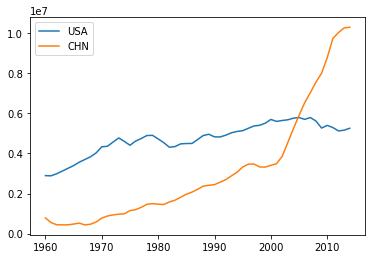

In [19]:
# 3. Remove if you can those rows that are not countries (regions and aggregated groups)
#       - Find the 10 countries with highest emissions in 2014
# ????


# 4. Plot the emissions of China and USA over time respectively
ts_us = data.loc[data['Country Name'] == 'United States'].iloc[0][4:-6]
ts_china = data.loc[data['Country Name'] == 'China'].iloc[0][4:-6]

ts = pd.concat([ts_us, ts_china], axis=1, keys=['USA','CHN'])
ts.plot()


## Exercise pandas dataframe
1. Using the dataframe in the below cell find:
    1. Mean, Min, Max values for all 4 columns
    2. The 2 dates with the largest and smallest sum (by column)
    3. All A's and B's that are positive

In [20]:
dates = pd.date_range('20200302', periods=6) # create 6 dates from march 2, 2020
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # use np.random.randn to generate a dataframe of 6 by 4 random numbers
print(dates)
print(df)

DatetimeIndex(['2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07'],
              dtype='datetime64[ns]', freq='D')
                   A         B         C         D
2020-03-02  1.455307 -1.312594  0.418291  0.632493
2020-03-03 -0.963906 -0.488228  0.041860 -0.253042
2020-03-04  0.896047 -0.255536  0.140929 -0.382948
2020-03-05 -1.085054 -0.175478  0.373590 -0.587172
2020-03-06  0.389498 -1.069541  0.262817  0.777256
2020-03-07  0.696267  1.592504  1.125465 -0.840053


In [66]:
# 1. Mean, Min, Max values for all 4 columns
min_value = df.min()
max_value = df.max()
mean_value = df.mean()
min_d = df.sort_values('D', axis=0, ascending=True)['D'][0]
print(min_value)
print(max_value)
print(mean_value)




A   -1.085054
B   -1.312594
C    0.041860
D   -0.840053
dtype: float64
A    1.455307
B    1.592504
C    1.125465
D    0.777256
dtype: float64
A    0.231360
B   -0.284812
C    0.393826
D   -0.108911
dtype: float64


In [67]:
# 2. The 2 dates with the largest and smallest sum (by column)
largest_sum = df.sum().sort_values(ascending=False)[0]
smallest_sum = df.sum().sort_values(ascending=True)[0]
print(largest_sum)
print(smallest_sum)

2.362953048231476
-1.7088729462133896


In [75]:
# 3. All A's and B's that are positive
positive_a = df['A'][(df['A'] > 0)]
positive_b = df['B'][df['B'] > 0]
print(positive_a)
print(positive_b)

2020-03-02    1.455307
2020-03-04    0.896047
2020-03-06    0.389498
2020-03-07    0.696267
Name: A, dtype: float64
2020-03-07    1.592504
Freq: D, Name: B, dtype: float64
